OUTLIERS

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns

Methods of decting outliers
a) Boxplot (for visualizing outliers)
b) z-score (for normally distributed data)
c) IQR-Inter quartile range (for Skwed data)
d) percentile method

In [75]:
df=pd.read_csv('all_seasons (2).csv')

In [76]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,5.7,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,2.3,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,0.8,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,3.7,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11145 entries, 0 to 11144
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         11145 non-null  int64  
 1   player_name        11145 non-null  object 
 2   team_abbreviation  11145 non-null  object 
 3   age                11145 non-null  float64
 4   player_height      11145 non-null  float64
 5   player_weight      11145 non-null  float64
 6   college            11145 non-null  object 
 7   country            11145 non-null  object 
 8   draft_year         11145 non-null  object 
 9   draft_round        11145 non-null  object 
 10  draft_number       11145 non-null  object 
 11  gp                 11145 non-null  int64  
 12  pts                11145 non-null  float64
 13  reb                11145 non-null  float64
 14  ast                11145 non-null  float64
 15  net_rating         11145 non-null  float64
 16  oreb_pct           111

In [78]:
df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

In [79]:
df['player_weight'].describe()

count    11145.000000
mean       100.637868
std         12.576295
min         60.327736
25%         90.718400
50%         99.790240
75%        109.315672
max        163.293120
Name: player_weight, dtype: float64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='player_weight'>

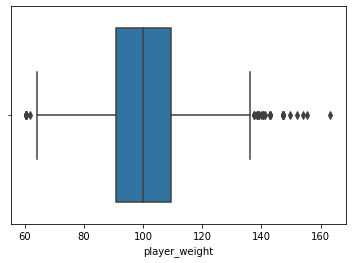

In [80]:
sns.boxplot(df['player_weight']) #detecting outliers from boxplot

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

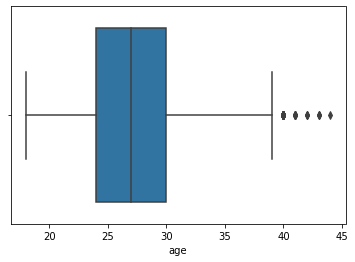

In [81]:
sns.boxplot(df["age"]) #detecting outliers from boxplot for age

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

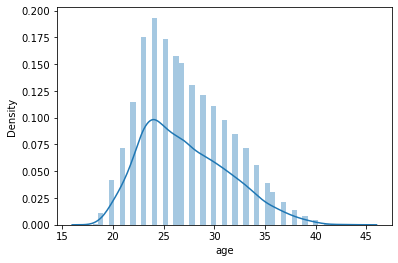

In [82]:
sns.distplot(df["age"])#detecting outliers from distribution plot for age

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='player_weight', ylabel='Density'>

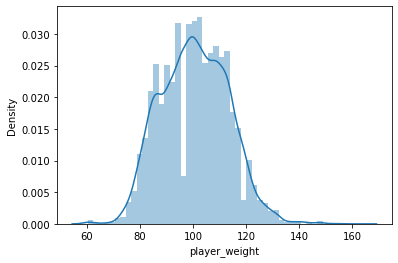

In [83]:
sns.distplot(df["player_weight"])#detecting outliers from distribution plot for age

In [84]:
df['player_weight'].skew()#finding skew of player weight coloumn

0.1469057175740028

In [85]:
df["age"].skew()#finding skew of player age coloumn

0.5458567811632224

In [86]:
df["player_height"].skew()#finding skew of player height coloumn

-0.3775857815158464

Detecting outliers using the Z-scores
Criteria: any data point whose Z-score falls out of 3rd standard deviation is an outlier.

In [87]:
df['age'].describe()

count    11145.000000
mean        27.168686
std          4.344164
min         18.000000
25%         24.000000
50%         27.000000
75%         30.000000
max         44.000000
Name: age, dtype: float64

In [88]:
#calculation of Z-score
df['z_score_age']=(df['age']-df['age'].mean())/df['age'].std()

In [89]:
df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_age
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,2.032915
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0.191364
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,2.723496
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,-0.729412
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,1.572527


In [90]:
#finding upper limit and lower limit
upper_limit=df['age'].mean()+3*df['age'].std()
lower_limit=df['age'].mean()-3*df['age'].std()

In [91]:
upper_limit,lower_limit

(40.20117652485656, 14.13619449353734)

In [95]:
#removing the outliers considering from age columns.
#trimining method
df = df[~((df['age']>upper_limit ) | (df['age']<lower_limit))]

In [96]:
df

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_age
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,2.032915
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0.191364
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,2.723496
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,-0.729412
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,1.572527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0.191364
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,-0.959606
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,0.191364
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,-0.038830


In [99]:
df_no_outlier_trim = df[(df['age'] <= upper_limit) & (df["age"] >= lower_limit)]

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

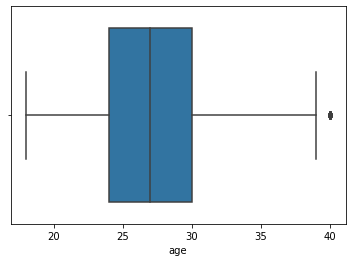

In [102]:
sns.boxplot(df_no_outlier_trim['age'])#graph after removing the outliers

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

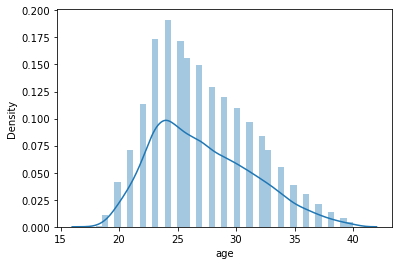

In [103]:
sns.distplot(df_no_outlier_trim['age'])#graph after removing the outliers

In [104]:
# removing outliers through clipping method
# using np.where https://numpy.org/doc/stable/reference/generated/numpy.where.html
# np.where(condition, if condition is true then this value returned, else this value)


In [105]:
df_no_outlier_clip=df.copy()

In [109]:
df_no_outlier_clip['age']=np.where(df_no_outlier_clip['age']>upper_limit,upper_limit,np.where(df_no_outlier_clip['age']<lower_limit,lower_limit,df_no_outlier_clip['age']))

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

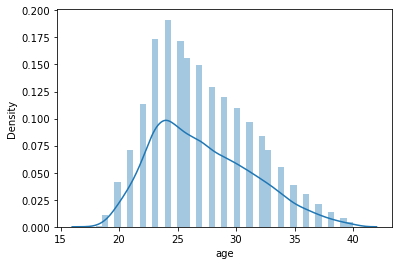

In [110]:
sns.distplot(df_no_outlier_clip['age']) #graph after cliping method

Decting outlier using IQR method
IQR=Q3-Q1


In [111]:
df['age'].describe() #detail of column can be extracted

count    11131.000000
mean        27.150211
std          4.315384
min         18.000000
25%         24.000000
50%         27.000000
75%         30.000000
max         40.000000
Name: age, dtype: float64

In [116]:
q1=df['age'].quantile(.25) #calculation of quantile(q1)

In [115]:
q3=df['age'].quantile(.75) #calculation of quantile(q3)

In [117]:
IQR=q3-q1#calculation of IQR

In [119]:
IQR

6.0

In [121]:
#compute lower bound = (Q1–1.5IQR), upper bound = (Q3+1.5IQR)
lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR
lower_bound, upper_bound

(15.0, 39.0)

In [122]:
df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_age
203,203,Charles Jones,HOU,40.0,205.74,97.522280,Albany State (GA),USA,1979,8,...,1.1,0.3,2.6,0.068,0.103,0.025,0.400,0.046,1996-97,2.95369
385,385,John Long,TOR,40.0,195.58,90.718400,Detroit Mercy,USA,1978,2,...,1.3,0.7,-9.8,0.017,0.101,0.182,0.499,0.104,1996-97,2.95369
870,870,Herb Williams,NYK,40.0,208.28,109.769264,Ohio State,USA,1981,1,...,1.1,0.1,-8.0,0.042,0.160,0.143,0.398,0.041,1997-98,2.95369
944,944,Dan Schayes,ORL,40.0,210.82,117.933920,Syracuse,USA,1981,1,...,0.7,0.2,7.2,0.026,0.098,0.131,0.431,0.044,1998-99,2.95369
1155,1155,Rick Mahorn,PHI,40.0,208.28,117.933920,Hampton,USA,1980,2,...,1.4,0.1,-12.2,0.061,0.170,0.099,0.302,0.024,1998-99,2.95369
1250,1250,Eddie Johnson,HOU,40.0,200.66,97.522280,Illinois,USA,1981,2,...,0.7,0.3,-20.8,0.000,0.154,0.292,0.462,0.063,1998-99,2.95369
2195,2195,Sam Perkins,IND,40.0,205.74,117.933920,North Carolina,USA,1984,1,...,2.6,0.6,0.1,0.037,0.159,0.123,0.499,0.066,2000-01,2.95369
2274,2274,John Stockton,UTA,40.0,185.42,79.378600,Gonzaga,USA,1984,1,...,3.2,8.2,3.1,0.028,0.099,0.197,0.601,0.442,2001-02,2.95369
3009,3009,Kevin Willis,SAS,40.0,213.36,111.130040,Michigan State,USA,1984,1,...,3.2,0.3,-6.0,0.116,0.206,0.196,0.506,0.051,2002-03,2.95369
3055,3055,Michael Jordan,WAS,40.0,198.12,97.975872,North Carolina,USA,1984,1,...,6.1,3.8,0.0,0.028,0.167,0.288,0.491,0.207,2002-03,2.95369


In [123]:
# remove outliers using trim

df_no_outlier_trim = df[~((df["age"] < lower_bound) | (df["age"]> upper_bound))]

In [124]:
df_no_outlier_trim

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season,z_score_age
0,0,Dennis Rodman,CHI,36.0,198.12,99.790240,Southeastern Oklahoma State,USA,1986,2,...,16.1,3.1,16.1,0.186,0.323,0.100,0.479,0.113,1996-97,2.032915
1,1,Dwayne Schintzius,LAC,28.0,215.90,117.933920,Florida,USA,1990,1,...,1.5,0.3,12.3,0.078,0.151,0.175,0.430,0.048,1996-97,0.191364
2,2,Earl Cureton,TOR,39.0,205.74,95.254320,Detroit Mercy,USA,1979,3,...,1.0,0.4,-2.1,0.105,0.102,0.103,0.376,0.148,1996-97,2.723496
3,3,Ed O'Bannon,DAL,24.0,203.20,100.697424,UCLA,USA,1995,1,...,2.3,0.6,-8.7,0.060,0.149,0.167,0.399,0.077,1996-97,-0.729412
4,4,Ed Pinckney,MIA,34.0,205.74,108.862080,Villanova,USA,1985,1,...,2.4,0.2,-11.2,0.109,0.179,0.127,0.611,0.040,1996-97,1.572527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11140,11140,Maxi Kleber,DAL,28.0,208.28,108.862080,None,Germany,Undrafted,Undrafted,...,5.4,1.1,4.6,0.056,0.140,0.136,0.605,0.064,2019-20,0.191364
11141,11141,Melvin Frazier Jr.,ORL,23.0,195.58,97.522280,Tulane,USA,2018,2,...,0.3,0.1,-2.4,0.018,0.058,0.164,0.480,0.033,2019-20,-0.959606
11142,11142,Meyers Leonard,MIA,28.0,213.36,117.933920,Illinois,USA,2012,1,...,5.1,1.1,5.6,0.029,0.217,0.120,0.640,0.076,2019-20,0.191364
11143,11143,Norvel Pelle,PHI,27.0,208.28,104.779752,None,USA,Undrafted,Undrafted,...,3.0,0.4,-16.4,0.085,0.237,0.126,0.521,0.056,2019-20,-0.038830


In [126]:
df_no_outlier_clip['age']= np.where(df_no_outlier_clip['age']>upper_bound,upper_bound,np.where(df_no_outlier_clip['age']<lower_bound,lower_bound,df_no_outlier_clip['age']))

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

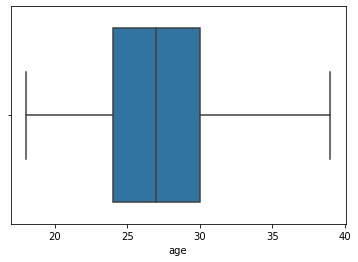

In [127]:
sns.boxplot(df_no_outlier_clip["age"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

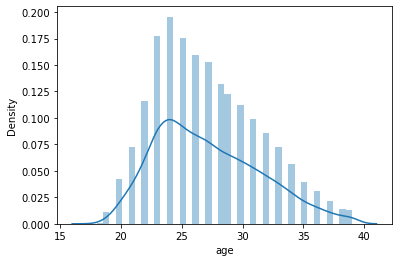

In [128]:
sns.distplot(df_no_outlier_clip["age"])

Percentile method
This technique works by setting a particular threshold value, which decides based on our problem statement.
Here we always maintain symmetry on both sides means if remove 1% from the right then in the left we also drop by 1%.
While we remove the outliers using capping, then that particular method is known as Winsorization

In [129]:
upper_limit = df['player_weight'].quantile(0.99)
lower_limit = df['player_weight'].quantile(0.01)
upper_limit, lower_limit

(130.22626320000097, 74.84268)

In [130]:
# trim outliers
df_no_outlier_trim = df[(df['player_weight'] <= upper_limit) & (df['player_weight'] >= lower_limit)]

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='player_weight'>

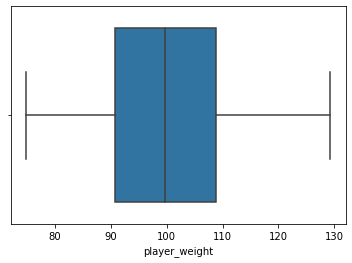

In [131]:
sns.boxplot(df_no_outlier_trim["player_weight"])

In [133]:
# Capping(Winsorization)
# np.where(condition, if condition is true then this value returned, else this value)
df_no_outlier_clip = df.copy()
df_no_outlier_clip["player_weight"] = np.where(
                      df_no_outlier_clip["player_weight"] > upper_limit,
                      upper_limit,
                      np.where(df_no_outlier_clip["player_weight"] < lower_limit,
                               lower_limit,
                               df_no_outlier_clip["player_weight"]))

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='player_weight'>

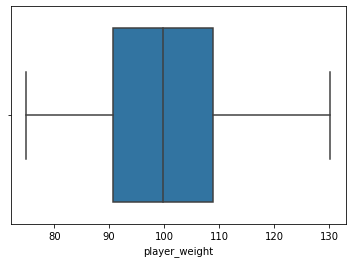

In [134]:
sns.boxplot(df_no_outlier_clip["player_weight"])

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='player_weight', ylabel='Density'>

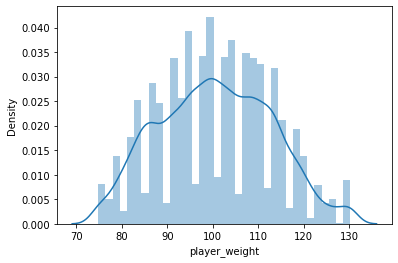

In [135]:
sns.distplot(df_no_outlier_clip["player_weight"])